In [39]:
import os
import django
import json
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'rest.settings')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

from app import library
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor



In [32]:
df = library.cleaning_dataset()
df.copy()

C:\Users\lenov\miniconda3\envs\flightdelay\Lib\site-packages\django_pandas\io.py:84: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  fieldnames = pd.unique(fieldnames)


{'dataset_null': [{'id': 1301,
   'year': 2019,
   'month': 12,
   'carrier__carrier_name': 'SkyWest Airlines Inc.',
   'airport__airport_name': 'Melbourne, FL: Melbourne Orlando International',
   'arr_flights': None,
   'arr_del15': None,
   'carrier_ct': None,
   'weather_ct': None,
   'nas_ct': None,
   'security_ct': None,
   'late_aircraft_ct': None,
   'arr_cancelled': None,
   'arr_diverted': None,
   'arr_delay': None,
   'carrier_delay': None,
   'weather_delay': None,
   'nas_delay': None,
   'security_delay': None,
   'late_aircraft_delay': None},
  {'id': 4025,
   'year': 2019,
   'month': 10,
   'carrier__carrier_name': 'Delta Air Lines Inc.',
   'airport__airport_name': 'Pasco/Kennewick/Richland, WA: Tri Cities',
   'arr_flights': None,
   'arr_del15': None,
   'carrier_ct': None,
   'weather_ct': None,
   'nas_ct': None,
   'security_ct': None,
   'late_aircraft_ct': None,
   'arr_cancelled': None,
   'arr_diverted': None,
   'arr_delay': None,
   'carrier_delay': None,

In [33]:
df_clean = DatasetClean.objects.all()
df_1 = df_clean.to_dataframe()
df_1.copy()


,id,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1,2019,12,9E,ABE,53.0,6.0,3.05,0.22,0.21,0.00,2.52,0.0,0.0,265.0,110.0,10.0,6.0,0.0,139.0
1,2,2019,12,9E,AEX,115.0,4.0,0.03,0.00,1.35,0.00,2.62,0.0,2.0,157.0,1.0,0.0,40.0,0.0,116.0
2,3,2019,12,9E,AGS,191.0,13.0,7.49,2.31,1.48,0.00,1.73,0.0,1.0,678.0,332.0,153.0,82.0,0.0,111.0
3,4,2019,12,9E,ALB,6.0,1.0,0.00,0.00,1.00,0.00,0.00,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0
4,5,2019,12,9E,ATL,3802.0,468.0,115.80,11.79,148.86,0.45,191.11,3.0,0.0,32762.0,11503.0,608.0,4885.0,93.0,15673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80489,80490,2014,12,WN,AMA,151.0,56.0,26.18,2.39,4.96,0.00,22.47,3.0,1.0,2155.0,829.0,147.0,160.0,0.0,1019.0
80490,80491,2014,12,WN,SJU,354.0,67.0,22.42,1.00,9.45,0.00,34.14,0.0,0.0,3057.0,979.0,33.0,385.0,0.0,1660.0
80491,80492,2014,12,WN,SLC,807.0,323.0,135.76,0.98,33.75,1.15,151.35,3.0,0.0,14672.0,5356.0,26.0,1191.0,25.0,8074.0
80492,80493,2014,12,EV,PHX,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
encoder = LabelEncoder()
df_1['carrier'] = encoder.fit_transform(df_1['carrier'])
df_1['airport'] = encoder.fit_transform(df_1['airport'])
x = df_1.drop('late_aircraft_delay', axis=1)
y = df_1['late_aircraft_delay']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=44)
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (80474, 19)
x_test shape is: (20, 19)
y_train shape is: (80474,)
y_test shape is: (20,)


In [27]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=33)

In [28]:
print('Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('No. of features are : ' , RandomForestRegressorModel.n_features_in_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Train Score is :  0.9805727529369199
Test Score is :  0.9917845039040608
No. of features are :  19
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [ 1699.41318089    66.1502982  23969.11039901   610.15867284
  2002.78585902   635.80366444   635.80366444    66.1502982
   307.2021802     89.34856538]


In [31]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  186724.8209330245


In [92]:
random_forest = library.random_forest_regressor(df_1)
random_forest

UnboundLocalError: cannot access local variable 'linear_regression' where it is not associated with a value

In [100]:
library.random_forest_regressor(df_1)

{'train_score': 0.9805727529369199,
 'test_score': 0.9917845039040608,
 'y_test': 18506     1929.0
 22852      144.0
 13261    22360.0
 27267      572.0
 14177     2326.0
 50973      322.0
 35514     1413.0
 51144       94.0
 36201      577.0
 46884       67.0
 16213        0.0
 74877      335.0
 80079      980.0
 8496       724.0
 11567        0.0
 76446      821.0
 32169      469.0
 1063       719.0
 4658      2288.0
 60910       75.0
 Name: late_aircraft_delay, dtype: float64,
 'y_pred': array([ 1699.41318089,    66.1502982 , 23969.11039901,   610.15867284,
         2002.78585902,   635.80366444,   635.80366444,    66.1502982 ,
          307.2021802 ,    89.34856538,    66.1502982 ,   307.2021802 ,
          974.27783496,   523.33364592,    66.1502982 ,   635.80366444,
          307.2021802 ,   948.63284336,  2360.50723402,   263.95568669]),
 'MSEValue': 186724.8209330245}

In [123]:
linear = library.linear_regression(df_1)
linear

{'train_score': 0.9999999884077421,
 'test_score': 0.99999999646993,
 'y_test': 18506     1929.0
 22852      144.0
 13261    22360.0
 27267      572.0
 14177     2326.0
 50973      322.0
 35514     1413.0
 51144       94.0
 36201      577.0
 46884       67.0
 16213        0.0
 74877      335.0
 80079      980.0
 8496       724.0
 11567        0.0
 76446      821.0
 32169      469.0
 1063       719.0
 4658      2288.0
 60910       75.0
 Name: late_aircraft_delay, dtype: float64,
 'y_pred': array([ 1.92837038e+03,  1.43356402e+02,  2.23599777e+04,  5.71992962e+02,
         2.32600602e+03,  3.22000073e+02,  1.41299510e+03,  9.39910980e+01,
         5.76996262e+02,  6.63657635e+01, -4.89192697e-03,  3.34990221e+02,
         9.79988377e+02,  7.23996143e+02, -1.00230041e-02,  8.20996810e+02,
         4.68997804e+02,  7.19001946e+02,  2.28862495e+03,  7.49901155e+01]),
 'MSEValue': 0.0802327307842663}

In [125]:
library.decision_tree(df_1)

{'train_score': 1.0,
 'test_score': 0.9899865886929874,
 'y_test': 18506     1929.0
 22852      144.0
 13261    22360.0
 27267      572.0
 14177     2326.0
 50973      322.0
 35514     1413.0
 51144       94.0
 36201      577.0
 46884       67.0
 16213        0.0
 74877      335.0
 80079      980.0
 8496       724.0
 11567        0.0
 76446      821.0
 32169      469.0
 1063       719.0
 4658      2288.0
 60910       75.0
 Name: late_aircraft_delay, dtype: float64,
 'y_pred': array([ 2027.,   188., 20290.,   581.,  2269.,   430.,  1041.,   158.,
          564.,   192.,     0.,   320.,   945.,   654.,     0.,   663.,
          412.,   564.,  2431.,   130.]),
 'MSEValue': 227588.5}

In [128]:
extra_trees = library.extra_trees_regressor(df_1)

In [129]:
extra_trees

{'train_score': 1.0,
 'test_score': 0.997037638610774,
 'y_test': 18506     1929.0
 22852      144.0
 13261    22360.0
 27267      572.0
 14177     2326.0
 50973      322.0
 35514     1413.0
 51144       94.0
 36201      577.0
 46884       67.0
 16213        0.0
 74877      335.0
 80079      980.0
 8496       724.0
 11567        0.0
 76446      821.0
 32169      469.0
 1063       719.0
 4658      2288.0
 60910       75.0
 Name: late_aircraft_delay, dtype: float64,
 'y_pred': array([ 1897.6 ,   140.14, 23427.66,   567.23,  2354.5 ,   557.99,
         1119.95,    92.68,   424.65,   196.71,     0.  ,   282.27,
          938.51,   668.53,     0.  ,   772.52,   433.51,   701.93,
         2191.3 ,   124.21]),
 'MSEValue': 67329.64065499998}

In [147]:
dataset_clean = library.dataset_clean()

context = library.predict('ETR', dataset_clean)
context

{'train_score': 1.0,
 'test_score': 0.998553338817196,
 'y_test': [1929.0,
  144.0,
  22360.0,
  572.0,
  2326.0,
  322.0,
  1413.0,
  94.0,
  577.0,
  67.0,
  0.0,
  335.0,
  980.0,
  724.0,
  0.0,
  821.0,
  469.0,
  719.0,
  2288.0,
  75.0],
 'y_pred': [1903.29,
  156.48,
  23024.69,
  563.85,
  2336.98,
  554.43,
  1132.33,
  84.65,
  414.39,
  194.5,
  0.0,
  306.98,
  936.59,
  668.0,
  0.0,
  766.89,
  446.51,
  698.48,
  2121.12,
  116.16],
 'MSEValue': 32880.24814999992}

In [140]:
context['MSEValue']

0.0802327307842663

In [22]:
from app import library
dataset_clean = library.dataset_clean()
x_train,x_test,y_train,y_test = library.split_data(dataset_clean)
x_train = x_train.merge(y_train.to_frame(), left_index=True, right_index=True)
x_train

,id,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
64330,64331,2016,2,5,98,103.0,34.0,14.55,0.00,3.91,0.0,15.54,0.0,1.0,2306.0,1053.0,0.0,180.0,0.0,1073.0
78131,78132,2015,2,17,269,692.0,140.0,41.97,8.54,30.80,0.0,58.70,39.0,1.0,6307.0,2095.0,386.0,1246.0,0.0,2580.0
18243,18244,2019,2,8,238,8.0,3.0,0.49,0.00,1.46,0.0,1.05,0.0,0.0,75.0,14.0,0.0,29.0,0.0,32.0
23229,23230,2018,11,5,255,1199.0,354.0,51.81,2.21,141.79,0.0,158.19,63.0,0.0,40011.0,8232.0,531.0,14592.0,0.0,16656.0
51315,51316,2017,3,13,243,38.0,8.0,4.07,0.00,0.99,0.0,2.94,1.0,0.0,479.0,203.0,0.0,59.0,0.0,217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53123,53124,2017,1,5,348,116.0,27.0,14.37,0.00,3.20,0.0,9.42,2.0,0.0,1237.0,733.0,0.0,130.0,0.0,374.0
49723,49724,2017,4,3,296,205.0,38.0,17.81,0.00,6.39,0.0,13.80,1.0,0.0,2057.0,820.0,0.0,332.0,0.0,905.0
25773,25774,2018,10,14,305,940.0,165.0,45.47,3.36,76.26,0.0,39.90,0.0,2.0,7601.0,2005.0,289.0,2635.0,0.0,2672.0
69027,69028,2015,10,17,92,5250.0,644.0,161.76,22.20,203.40,0.0,256.64,42.0,53.0,39773.0,9048.0,2913.0,10128.0,0.0,17684.0


In [70]:
x = DatasetClean.objects.all()[0].carrier.carrier_name
x

'Endeavor Air Inc.'

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
%matplotlib inline

C:\Users\lenov\miniconda3\envs\flightdelay\Lib\site-packages\django_pandas\utils.py:51: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  cache_keys = pk_series.apply(
C:\Users\lenov\miniconda3\envs\flightdelay\Lib\site-packages\django_pandas\utils.py:51: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  cache_keys = pk_series.apply(
C:\Users\lenov\miniconda3\envs\flightdelay\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lenov\miniconda3\envs\flightdelay\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

{'month': '<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="1296pt" height="432pt" viewBox="0 0 1296 432" xmlns="http://www.w3.org/2000/svg" version="1.1">\n <metadata>\n  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2023-11-13T11:32:14.653112</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.7.2, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>\n </defs>\n <g id="figure_1">\n  <g id="patch_1">\n   <pa

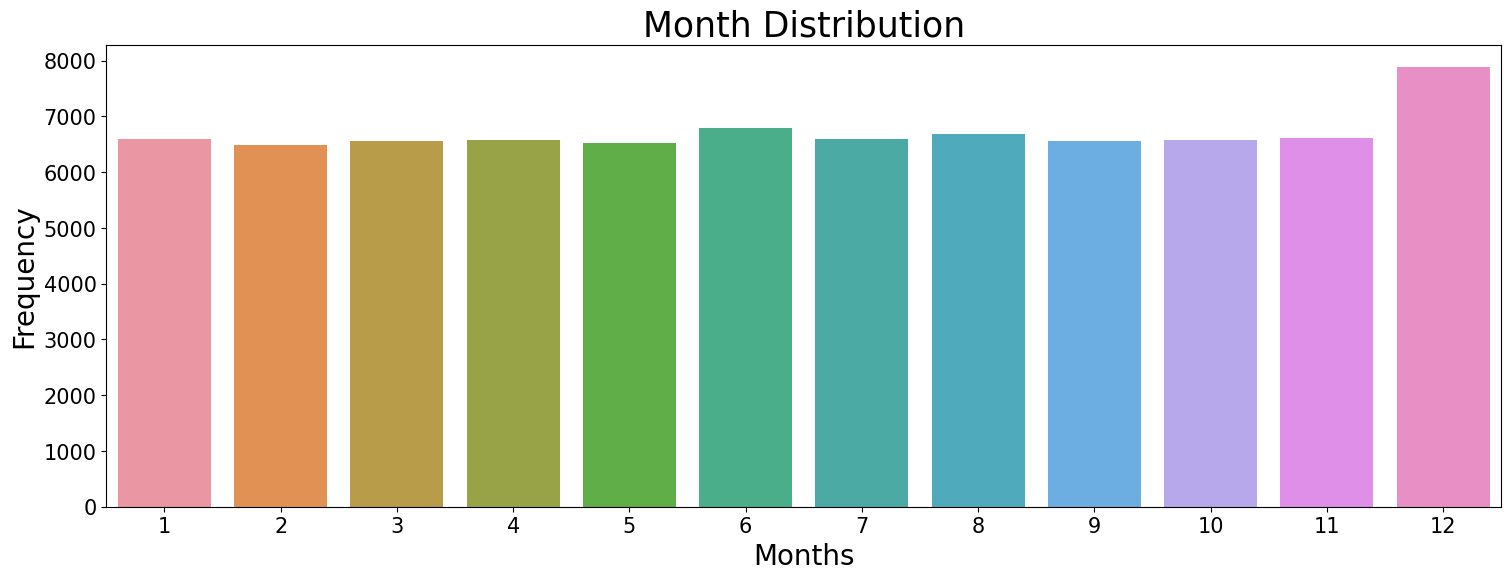

In [38]:
dataset_clean = library.dataset_clean()
plt.figure(figsize = (18, 6))
sns.countplot(dataset_clean, x='month')
plt.title('Month Distribution', size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Months", size = 20)
plt.ylabel("Frequency", size = 20)
imgdata = StringIO()
plt.savefig(imgdata, format='svg')
imgdata.seek(0)
data = imgdata.getvalue()
context = {
         'month': data,
}
context

In [29]:
dataset_clean['month'].astype(float)

0        12.0
1        12.0
2        12.0
3        12.0
4        12.0
         ... 
80489    12.0
80490    12.0
80491    12.0
80492    12.0
80493    12.0
Name: month, Length: 80494, dtype: float64

In [41]:
dataset = library.dataset_clean()
dataset

C:\Users\lenov\miniconda3\envs\flightdelay\Lib\site-packages\django\db\models\base.py:364: RuntimeWarning: Model 'app.airports' was already registered. Reloading models is not advised as it can lead to inconsistencies, most notably with related models.
  new_class._meta.apps.register_model(new_class._meta.app_label, new_class)
C:\Users\lenov\miniconda3\envs\flightdelay\Lib\site-packages\django\db\models\base.py:364: RuntimeWarning: Model 'app.carriers' was already registered. Reloading models is not advised as it can lead to inconsistencies, most notably with related models.
  new_class._meta.apps.register_model(new_class._meta.app_label, new_class)
C:\Users\lenov\miniconda3\envs\flightdelay\Lib\site-packages\django\db\models\base.py:364: RuntimeWarning: Model 'app.datasetraw' was already registered. Reloading models is not advised as it can lead to inconsistencies, most notably with related models.
  new_class._meta.apps.register_model(new_class._meta.app_label, new_class)
C:\Users\le

,id,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1,2019,12,9E,"ABE, Allentown/Bethlehem/Easton, PA: Lehigh Va...",53.0,6.0,3.05,0.22,0.21,0.00,2.52,0.0,0.0,265.0,110.0,10.0,6.0,0.0,139.0
1,2,2019,12,9E,"AEX, Alexandria, LA: Alexandria International",115.0,4.0,0.03,0.00,1.35,0.00,2.62,0.0,2.0,157.0,1.0,0.0,40.0,0.0,116.0
2,3,2019,12,9E,"AGS, Augusta, GA: Augusta Regional at Bush Field",191.0,13.0,7.49,2.31,1.48,0.00,1.73,0.0,1.0,678.0,332.0,153.0,82.0,0.0,111.0
3,4,2019,12,9E,"ALB, Albany, NY: Albany International",6.0,1.0,0.00,0.00,1.00,0.00,0.00,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0
4,5,2019,12,9E,"ATL, Atlanta, GA: Hartsfield-Jackson Atlanta I...",3802.0,468.0,115.80,11.79,148.86,0.45,191.11,3.0,0.0,32762.0,11503.0,608.0,4885.0,93.0,15673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80489,80490,2014,12,WN,"AMA, Amarillo, TX: Rick Husband Amarillo Inter...",151.0,56.0,26.18,2.39,4.96,0.00,22.47,3.0,1.0,2155.0,829.0,147.0,160.0,0.0,1019.0
80490,80491,2014,12,WN,"SJU, San Juan, PR: Luis Munoz Marin International",354.0,67.0,22.42,1.00,9.45,0.00,34.14,0.0,0.0,3057.0,979.0,33.0,385.0,0.0,1660.0
80491,80492,2014,12,WN,"SLC, Salt Lake City, UT: Salt Lake City Intern...",807.0,323.0,135.76,0.98,33.75,1.15,151.35,3.0,0.0,14672.0,5356.0,26.0,1191.0,25.0,8074.0
80492,80493,2014,12,EV,"PHX, Phoenix, AZ: Phoenix Sky Harbor Internati...",1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
